In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
df = pd.read_csv('winequality-red.csv')

In [5]:
df.head()
df.shape

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


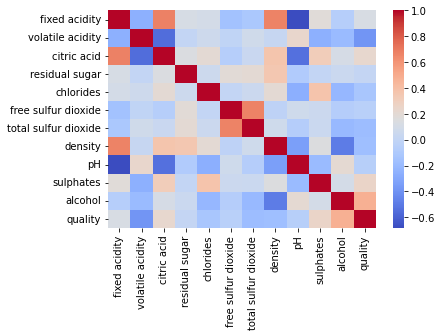

In [31]:
plt.figure()
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

In [12]:
#target variable and input variable seperations
y = df['quality']
X = df.drop(columns=['quality'])

In [13]:
#splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg.score(X, y)

0.3596518111855095

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(X_train, y_train)
log_reg.score(X,y)

C:\Users\erikc\anaconda3.1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5834896810506567

In [18]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
neigh.score(X, y)

0.626641651031895

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X)
mae = mean_absolute_error(y, rf_pred)
mse = mean_squared_error(y, rf_pred)
print('The Accuracy score is: ', rf.score(X,y), '.')
print('The Mean Absolute Error is: ', mae, '. This means that on average the random forest misses the quality by avg +- ~.074 points after taking the absolute value of the errors.')
print('The Mean Squared Error is: ', mse, '.  Actual value - predicted value, then squared, then averaged, emphasizes outliers because of the squaring.')
print('The Root Mean Squared Error is: ', math.sqrt(mse), '.  Sqrt of Mean Squared Error.')

The Accuracy score is:  0.9349593495934959 .
The Mean Absolute Error is:  0.06879299562226392 . This means that on average the random forest misses the quality by avg +- ~.074 points after taking the absolute value of the errors.
The Mean Squared Error is:  0.07629768605378362 .  Actual value - predicted value, then squared, then averaged, emphasizes outliers because of the squaring.
The Root Mean Squared Error is:  0.27622035778302734 .  Sqrt of Mean Squared Error.


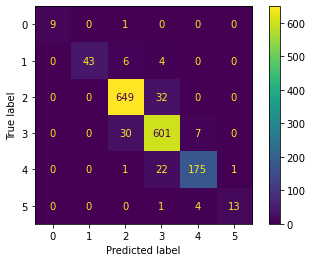

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
rf_pred = rf.predict(X)

rfcm = confusion_matrix(y, rf_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=rfcm)
disp.plot()
plt.show()